#DDM for Dataset 6

##Importing the libaries and loading the provided dataset

In [ ]:
# If running through Google Colab, run this cell to install pyddm
!pip -q install pyddm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 3.6 MB/s eta 0:00:00


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyddm
import pyddm.plot


In [ ]:
# Load the dataset
file_path = "https://raw.githubusercontent.com/slcalame/Files/refs/heads/main/dataset-6%20-%20Copy.tsv"
df_rt = pd.read_csv(file_path, sep='\t')

# Convert the columns to data types
df_rt["correct"] = (df_rt["S"] == df_rt["R"]).astype(int) # Create the "correct" column; 1 for correct, 0 for incorrect
df_rt["distractor"] = df_rt["distractor"].astype(str)
df_rt["rt"] = df_rt["rt"].astype(float)
df_rt["correct"] = df_rt["correct"].astype(int)
#print(df_rt)

# Create a PyDDM Sample
sample = pyddm.Sample.from_pandas_dataframe(
    df_rt,
    rt_column_name="rt", # Column with reaction times
    correct_column_name="correct", # Column indicating whether the response was correct or incorrect
)

# Inspect the sample to ensure it's properly formatted
#print(sample)

###Define the componentes of the model with the custom drift class and visualise the model

In [ ]:
# Define the model components
m = pyddm.Model(
    drift=pyddm.DriftConstant(drift=pyddm.Fittable(minval=-5, maxval=5)),
    noise=pyddm.NoiseConstant(noise=pyddm.Fittable(minval=.1, maxval=2)),
    overlay=pyddm.OverlayNonDecision(nondectime=pyddm.Fittable(minval=0, maxval=.5)))

# Visualize the model
pyddm.plot.model_gui_jupyter(model=m, sample=sample)

Output()

###Fit the model and show information of the model fit

In [ ]:
# Fit the model
pyddm.fit_adjust_model(model=m, sample=sample, lossfunction=pyddm.LossRobustLikelihood, verbose=False)

# Show information of the model fit
pyddm.display_model(m)

Info: Params [2.91010608 1.63394528 0.06737727] gave -816.3653758447874
Info:pyddm:Params [2.91010608 1.63394528 0.06737727] gave -816.3653758447874


Model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fitted parameters:
    - drift: 2.910106
Noise component NoiseConstant:
    constant
    Fitted parameters:
    - noise: 1.633945
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 1.000000
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fitted parameters:
    - nondectime: 0.067377
Fit information:
    Loss function: Negative log likelihood
    Loss function value: -816.3653758447874
    Fitting method: differential_evolution
    Solver: auto
    Other properties:
        - nparams: 3
        - samplesize: 5520
        - mess: ''



##DDM Model Setup

In [ ]:
# Define custom drift class for modeling distractor effects

class DriftDistractor(pyddm.Drift):
    name = "Drift depending on distractor presence"
    required_conditions = ["distractor"]  # Condition based on distractors
    required_parameters = ["drift_present", "drift_absent"]  # Fittable parameters for the two conditions

    def get_drift(self, t, x, conditions, **kwargs):
        if conditions["distractor"] == "present":
            return self.drift_present  # Use drift value for distractors present
        else:
            return self.drift_absent  # Use drift value for distractors absent

###Define the componentes of the DDM model with the custom drift class and visualise the model

In [ ]:
# Define the DDM model with the custom drift class and with fittable parameters
m = pyddm.Model(
    drift=DriftDistractor(drift_present=pyddm.Fittable(minval=-5, maxval=5), # Drift rate for trials with a distractor
                          drift_absent=pyddm.Fittable(minval=-5, maxval=5)),  # Drift rate for trials without a distractor
    noise=pyddm.NoiseConstant(noise=pyddm.Fittable(minval=0.1, maxval=2)), # Noise parameter
    overlay=pyddm.OverlayNonDecision(nondectime=pyddm.Fittable(minval=0, maxval=0.5)) # Non-decision time parameter
)

# Visualise the model
pyddm.plot.model_gui_jupyter(model=m, sample=sample)


Output()

###Fit the model and show information of the model fit

In [ ]:
# Fit the model
pyddm.fit_adjust_model(model=m, sample=sample, lossfunction=pyddm.LossRobustLikelihood, verbose=False)

# Show information of the model fit
pyddm.display_model(m)

Info: Params [2.65900025 3.18653294 1.63136528 0.06882117] gave -835.7652487732885
Info:pyddm:Params [2.65900025 3.18653294 1.63136528 0.06882117] gave -835.7652487732885


Model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftDistractor:
    Drift depending on distractor presence
    Fitted parameters:
    - drift_present: 2.659000
    - drift_absent: 3.186533
Noise component NoiseConstant:
    constant
    Fitted parameters:
    - noise: 1.631365
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 1.000000
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fitted parameters:
    - nondectime: 0.068821
Fit information:
    Loss function: Negative log likelihood
    Loss function value: -835.7652487732885
    Fitting method: differential_evolution
    Solver: auto
    Other properties:
        - nparams: 4
        - samplesize: 5520
        - mess: ''



## Data Visualisation


###Histogram of frequency of reaction times in raw data

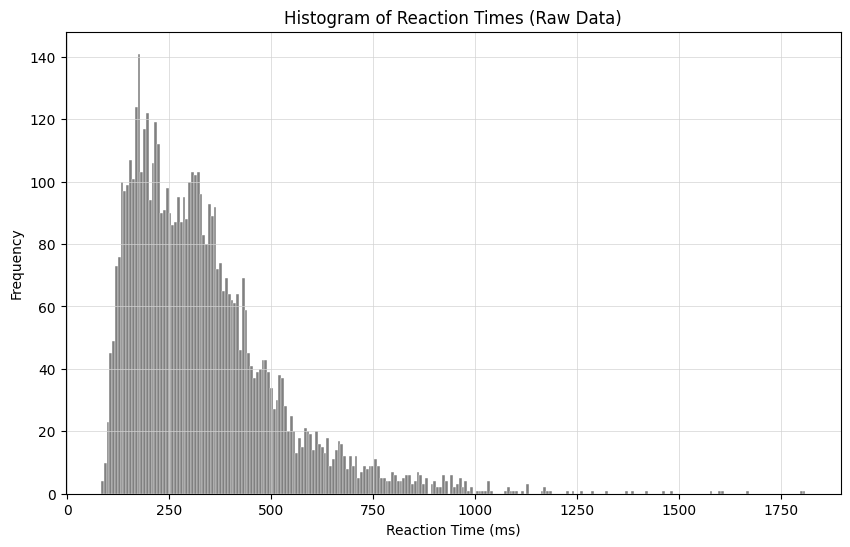

In [ ]:
# Plot the histogram of frequency of reaction times in raw data
plt.figure(figsize=(10, 6))
plt.hist(df_rt["rt"] * 1000, bins=250, color="grey", edgecolor="white", linewidth=0.3)
plt.title("Histogram of Reaction Times (Raw Data)")
plt.xlabel("Reaction Time (ms)")
plt.ylabel("Frequency")
plt.grid(True, color="lightgray", linestyle="-", linewidth=0.5)
plt.show()

###Histogram of frequency of reaction times in data without outliers

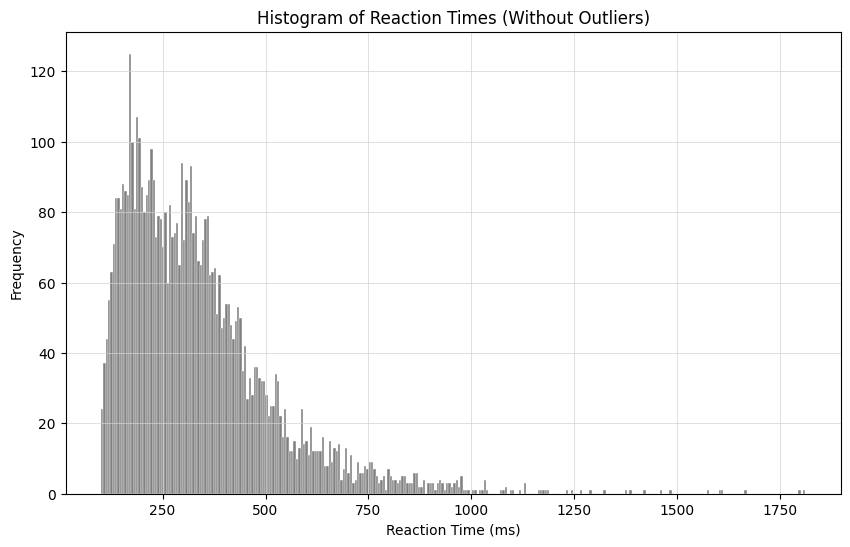

In [ ]:
# Plot the histogram of reaction times without outliers
df_rt = df_rt[(df_rt['rt'] > 0.1) & (df_rt['rt'] < 4.0)]  # Remove outliers

plt.figure(figsize=(10, 6))
plt.hist(df_rt["rt"] * 1000, bins=300, color="grey", edgecolor="white", linewidth=0.3)
plt.title("Histogram of Reaction Times (Without Outliers)")
plt.xlabel("Reaction Time (ms)")
plt.ylabel("Frequency")
plt.grid(True, color="lightgray", linestyle="-", linewidth=0.5)
plt.show()

###Histogram and density plot of reaction times for incorrect(0) and correct(1)responses

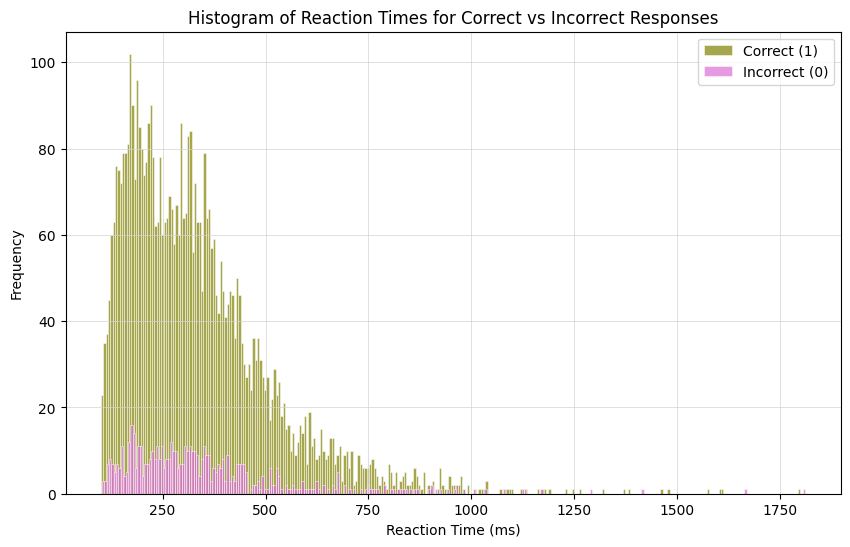

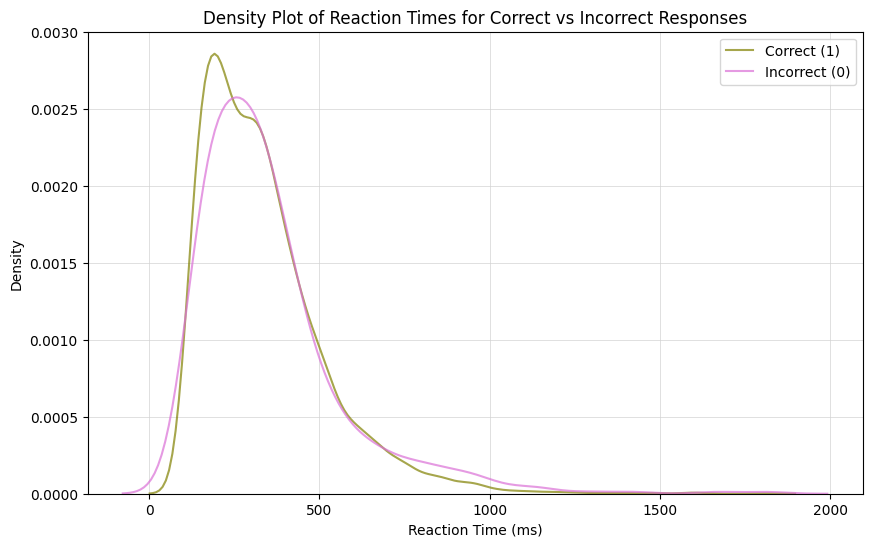

In [ ]:
# Plot the histogram of reaction times for correct (1) and incorrect (0) responses
plt.figure(figsize=(10, 6))
plt.hist(df_rt[df_rt["correct"] == 1]["rt"] * 1000, bins=300, color="olive", edgecolor="white", linewidth=0.5, alpha=0.7, label="Correct (1)")
plt.hist(df_rt[df_rt["correct"] == 0]["rt"] * 1000, bins=300, color="orchid", edgecolor="white", linewidth=0.5, alpha=0.7, label="Incorrect (0)")
plt.title("Histogram of Reaction Times for Correct vs Incorrect Responses")
plt.xlabel("Reaction Time (ms)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, color="lightgray", linestyle="-", linewidth=0.5)
plt.show()


# Density plot of reaction times for correct (1) and incorrect (0) responses
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.kdeplot(df_rt[df_rt["correct"] == 1]["rt"] * 1000,color="olive", alpha=0.7, label="Correct (1)")
sns.kdeplot(df_rt[df_rt["correct"] == 0]["rt"] * 1000, color="orchid", alpha=0.7, label="Incorrect (0)")
plt.title("Density Plot of Reaction Times for Correct vs Incorrect Responses")
plt.xlabel("Reaction Time (ms)")
plt.ylabel("Density")
plt.legend()
plt.grid(True, color="lightgray", linestyle="-", linewidth=0.5)
plt.show()

###Histogram and density plot of reaction times for condition 1 (distractors) and condition 2 (no distractors)

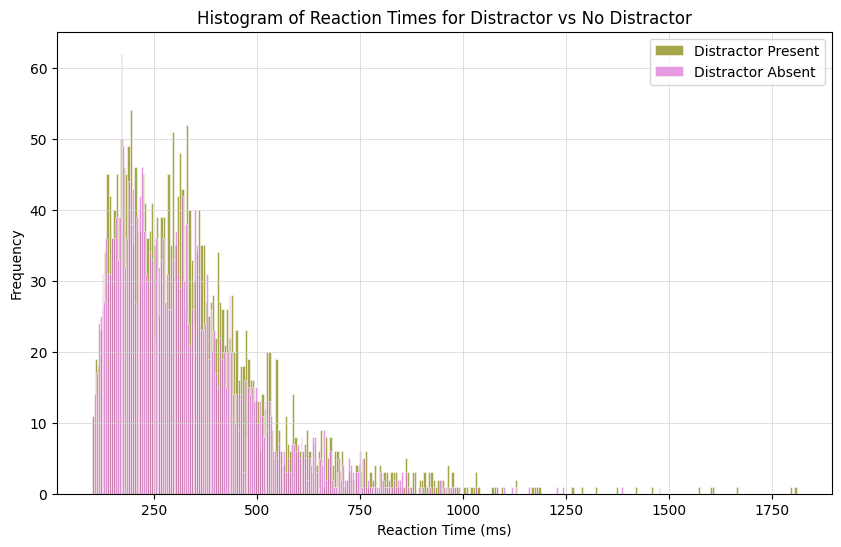

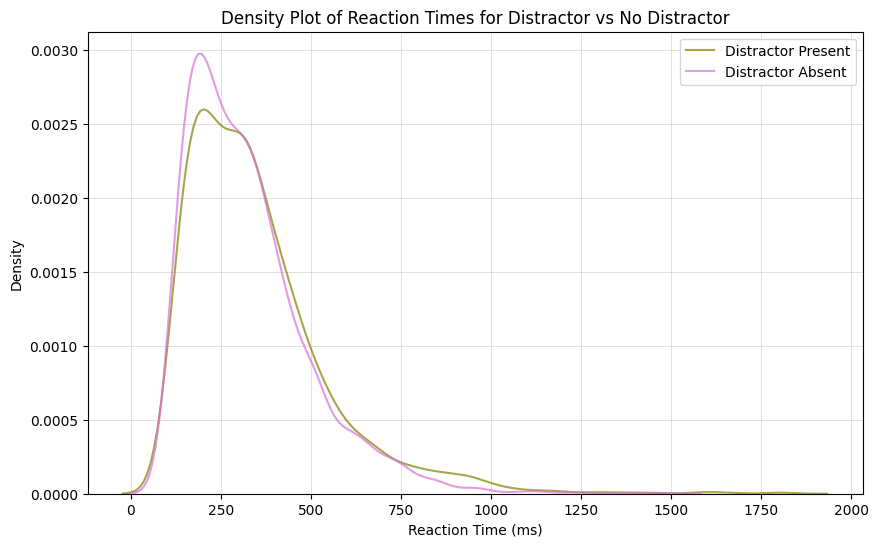

In [ ]:
# Plot the histogram of reaction times for distractor present (Condition 1) and absent (Condition 2)
plt.figure(figsize=(10, 6))
plt.hist(df_rt[df_rt["distractor"] == "present"]["rt"] * 1000, bins=300, color='olive', edgecolor='white', linewidth=0.5, alpha=0.7, label='Distractor Present') # Condition 1: Distractor present
plt.hist(df_rt[df_rt["distractor"] == "absent"]["rt"] * 1000, bins=300, color='orchid', edgecolor='white', linewidth=0.5, alpha=0.7, label='Distractor Absent') # Condition 2: Distractor absent
plt.title("Histogram of Reaction Times for Distractor vs No Distractor")
plt.xlabel("Reaction Time (ms)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, color="lightgray", linestyle="-", linewidth=0.5)
plt.show()



# Density plot of reaction times for correct (1) and incorrect (0) responses
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.kdeplot(df_rt[df_rt["distractor"] == "present"]["rt"] * 1000, color='olive', alpha=0.7, label='Distractor Present') # Condition 1: Distractor present
sns.kdeplot(df_rt[df_rt["distractor"] == "absent"]["rt"] * 1000, color='orchid', alpha=0.7, label='Distractor Absent') # Condition 2: Distractor absent
plt.title("Density Plot of Reaction Times for Distractor vs No Distractor")
plt.xlabel("Reaction Time (ms)")
plt.ylabel("Density")
plt.legend()
plt.grid(True, color="lightgray", linestyle="-", linewidth=0.5)
plt.show()